## K-means Clustering

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "3"  # Set the environment variable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('qsar_aquatic_toxicity.csv', sep = ';')
df

,TPSA(Tot),SAaacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


<Figure size 640x480 with 0 Axes>

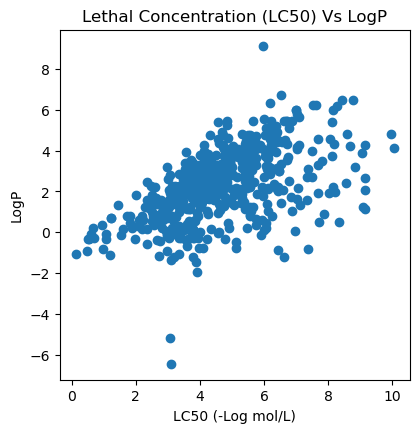

In [4]:
plt.clf()
fig = plt.figure(figsize = (7,7), dpi = 100)
axes1 = fig.add_axes([0.5, 0.5, 0.5, 0.5])
axes1.scatter(df['LC50'], df['MLOGP'])
axes1.set_xlabel('LC50 (-Log mol/L)')
axes1.set_ylabel('LogP')
axes1.set_title('Lethal Concentration (LC50) Vs LogP')
plt.show()

In [5]:
X = df[['LC50','MLOGP']].to_numpy()
X

array([[3.74 , 2.419],
       [4.33 , 2.638],
       [7.019, 5.799],
       ...,
       [6.219, 5.165],
       [4.995, 2.859],
       [2.48 , 2.255]])

In [6]:
kmeans_2_clusters = KMeans(n_clusters = 2, n_init = 10, random_state = 123)
kmeans_2_clusters.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=123)

In [7]:
print(kmeans_2_clusters.labels_)

[1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0
 0 1 1 1 0 1 0 0 1 1 1 0 

<Figure size 640x480 with 0 Axes>

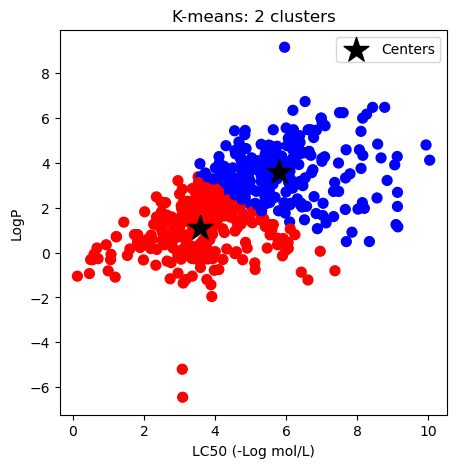

In [8]:
plt.clf()
plt.figure(figsize = (5,5), dpi = 100)
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans_2_clusters.labels_, cmap = plt.cm.bwr)
plt.scatter(kmeans_2_clusters.cluster_centers_[:,0],
            kmeans_2_clusters.cluster_centers_[:,1],
            marker = '*',
            s = 350,
            color = 'black',
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('LC50 (-Log mol/L)')
plt.ylabel('LogP')
plt.title('K-means: 2 clusters')
plt.show()

In [9]:
kmeans_3_clusters = KMeans(n_clusters = 3, n_init = 10, random_state = 123)
kmeans_3_clusters.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=123)

In [10]:
print(kmeans_3_clusters.labels_)

[0 0 1 1 1 0 1 0 0 0 0 2 1 2 0 0 0 1 2 2 0 0 2 2 1 1 1 1 0 1 1 0 0 1 2 2 1
 1 1 1 0 0 0 0 0 1 0 2 0 2 2 0 0 1 1 2 2 0 2 1 0 0 2 0 0 1 1 1 0 1 1 1 1 0
 2 0 0 1 2 0 1 0 0 1 1 0 1 1 2 2 0 1 1 1 0 2 0 0 1 2 1 2 2 1 0 2 2 1 1 1 1
 1 1 0 0 1 0 0 1 2 2 2 1 0 0 0 0 2 1 2 2 0 0 0 2 2 2 0 0 2 0 2 0 0 2 2 0 0
 0 0 0 2 2 2 0 2 1 1 2 0 0 1 0 0 2 2 2 1 2 2 1 1 1 1 1 0 1 0 0 0 2 0 2 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 2 0 0 0 1 2 0 0 0 0 1 0 0 1
 1 1 1 1 1 0 2 0 0 0 2 0 2 2 2 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0
 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 2 1 2 2 2 0 1 1 0 1 1 1 1 2 1
 0 1 1 0 2 2 2 0 0 0 2 2 2 2 2 0 1 1 0 0 2 0 2 0 0 1 1 1 1 0 0 0 1 2 2 2 0
 0 2 2 2 0 0 0 1 0 0 0 1 2 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 0 2 2 2 2 2 2
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 1 2 2 0 2 0 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 2 2 0 0 2 0 0 2 0 1 2
 2 2 0 2 1 0 0 1 1 1 0 0 1 0 1 1 0 0 2 2 0 0 0 2 0 1 1 1 0 2 1 0 2 0 0 2 1
 1 0 0 2 1 0 1 1 0 2 0 1 

<Figure size 640x480 with 0 Axes>

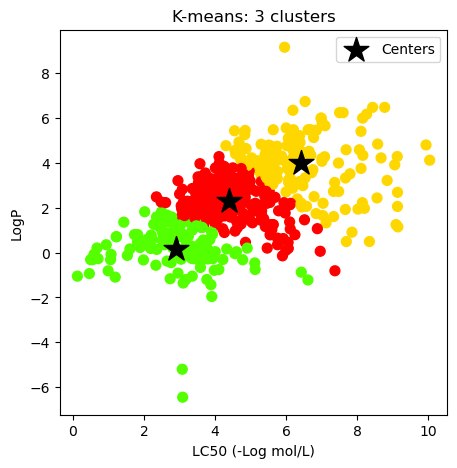

In [11]:
plt.clf()
plt.figure(figsize = (5,5), dpi = 100)
plt.scatter(X[:,0], X[:,1], s= 50, c= kmeans_3_clusters.labels_, cmap = plt.cm.prism)
plt.scatter(kmeans_3_clusters.cluster_centers_[:,0],
            kmeans_3_clusters.cluster_centers_[:,1],
            marker = '*',
            s = 350,
            color = 'black',
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('LC50 (-Log mol/L)')
plt.ylabel('LogP')
plt.title('K-means: 3 clusters')
plt.show()

In [12]:
X = df[['LC50', 'MLOGP']].to_numpy()
X

array([[3.74 , 2.419],
       [4.33 , 2.638],
       [7.019, 5.799],
       ...,
       [6.219, 5.165],
       [4.995, 2.859],
       [2.48 , 2.255]])

In [13]:
km_out_single_run = KMeans(n_clusters = 4, n_init = 1, random_state = 123).fit(X)
print(km_out_single_run.inertia_)

1014.3661736840186


In [14]:
km_out_single_run = KMeans(n_clusters = 4, n_init = 10, random_state = 123).fit(X)
print(km_out_single_run.inertia_)

916.4934272488367


In [15]:
km_out_single_run = KMeans(n_clusters = 4, n_init = 50, random_state = 123).fit(X)
print(km_out_single_run.inertia_)

916.4455784169934


1014.3661736840186
916.8174713956796
916.8174713956796
916.4934272488367
916.4934272488367
916.4934272488367
916.4934272488367
916.4934272488367
916.4934272488367
916.4934272488367
916.4934272488367
916.4934272488367
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934
916.4455784169934


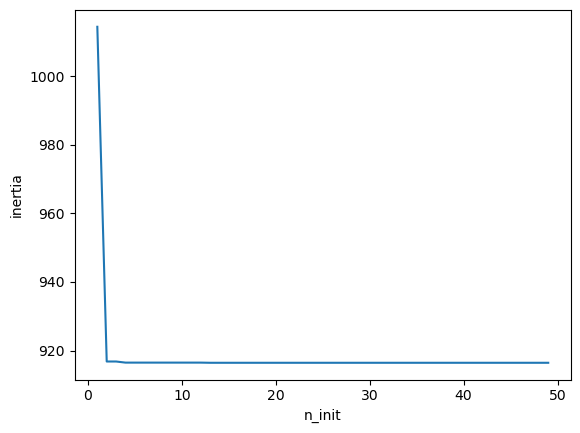

In [16]:
plt.clf()
inertia = []
ninit = []
for i in range (1,50):
    km_out_single_run = KMeans(n_clusters = 4, n_init = i, random_state = 123).fit(X)
    inertia.append(km_out_single_run.inertia_)
    ninit.append(i)
    print(km_out_single_run.inertia_)
plt.plot(ninit, inertia)
plt.xlabel('n_init')
plt.ylabel('inertia')
plt.show()

1014.3661736840186
916.8174713956796
916.8174713956796
916.4934272488367


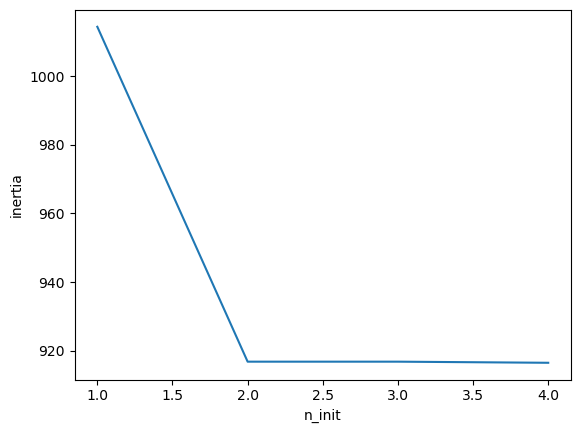

In [17]:
plt.clf()
inertia = []
ninit = []
for i in range (1,5):
    km_out_single_run = KMeans(n_clusters = 4, n_init = i, random_state = 123).fit(X)
    inertia.append(km_out_single_run.inertia_)
    ninit.append(i)
    print(km_out_single_run.inertia_)
plt.plot(ninit, inertia)
plt.xlabel('n_init')
plt.ylabel('inertia')
plt.show()

## Hierarchial Clustering

In [18]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(X, "complete") #maximim distance between objects #complete must not be in caps

In [19]:
hc_average = linkage(X, "average") #mean distance between objects
hc_single = linkage(X, "single") #minimum distance between objects


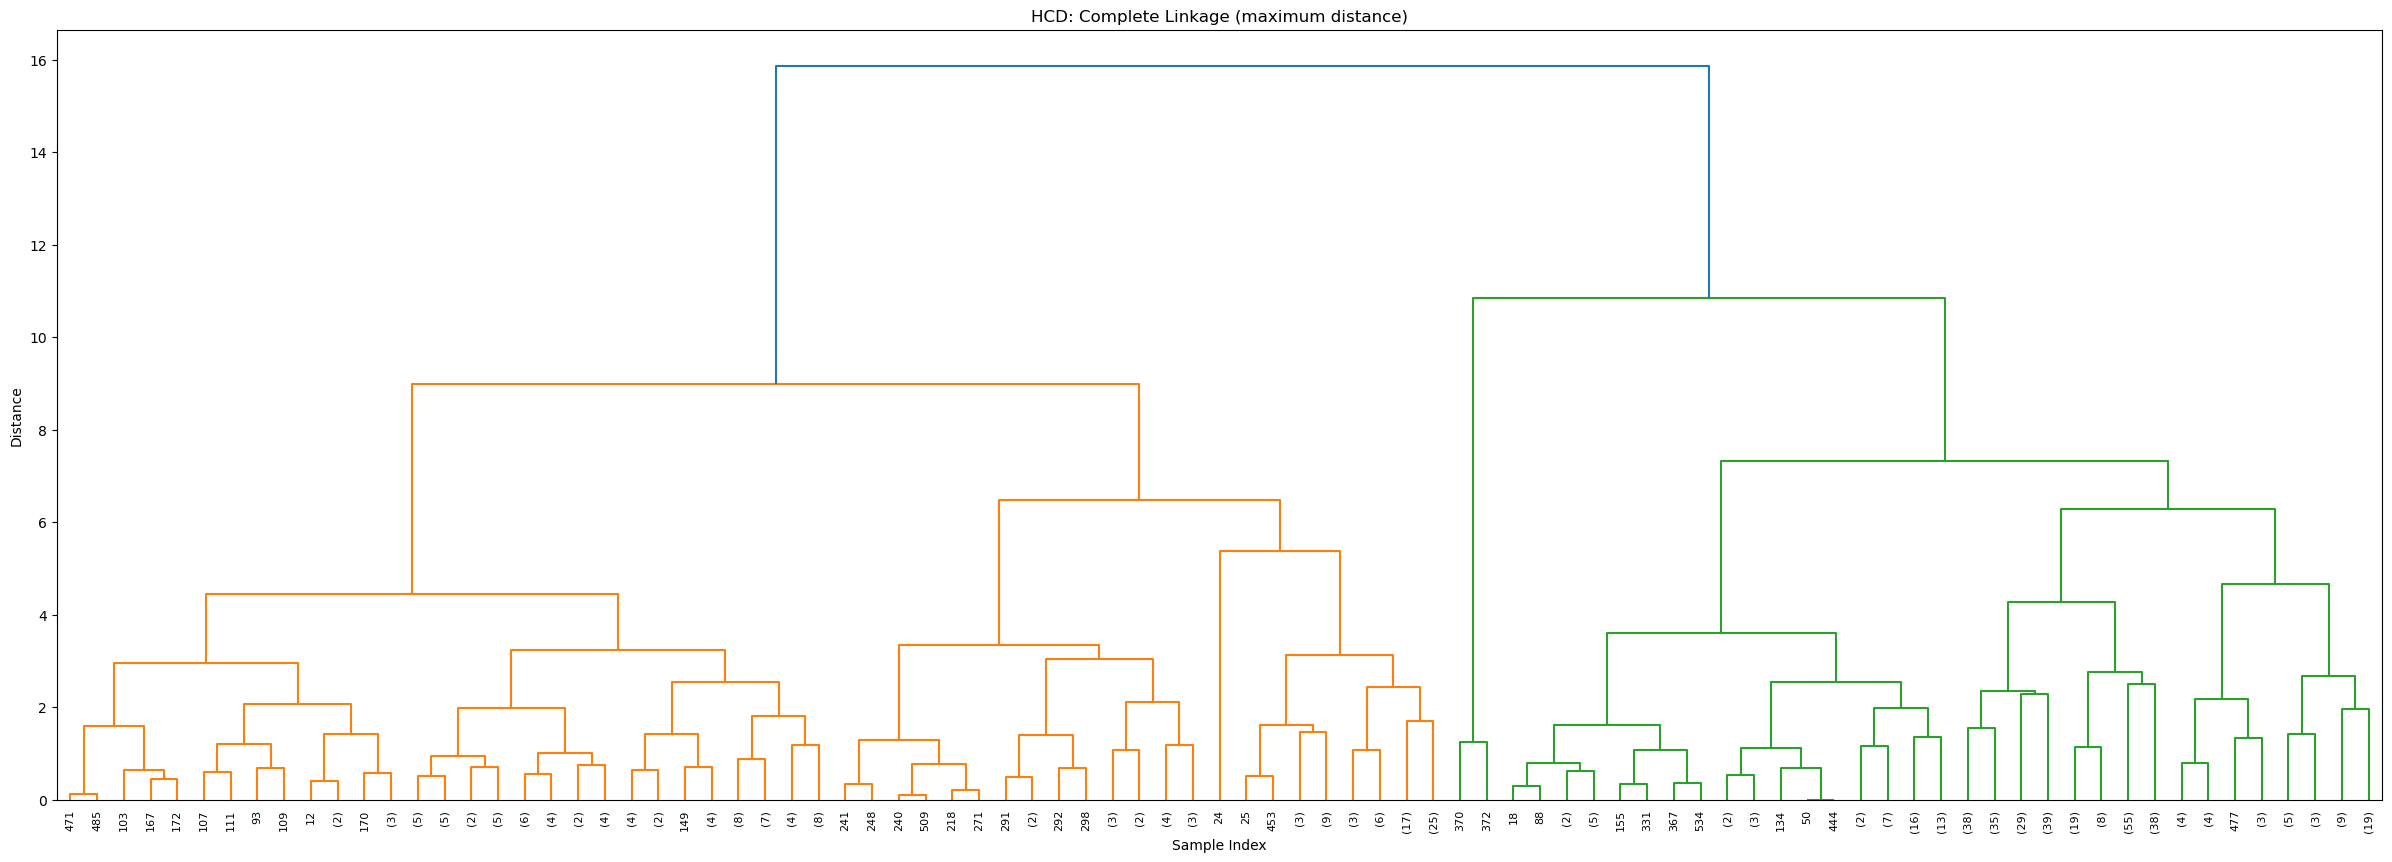

In [20]:
from scipy.cluster.hierarchy import dendrogram

#to calculate the complete linkage dendrogram
plt.figure(figsize =(30, 10))
plt.title('HCD: Complete Linkage (maximum distance)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    hc_complete, truncate_mode = 'level', p=6,
    leaf_rotation =90., #rotates the x axis labels
    leaf_font_size = 8., #font size for the x axis labels
)
plt.show()

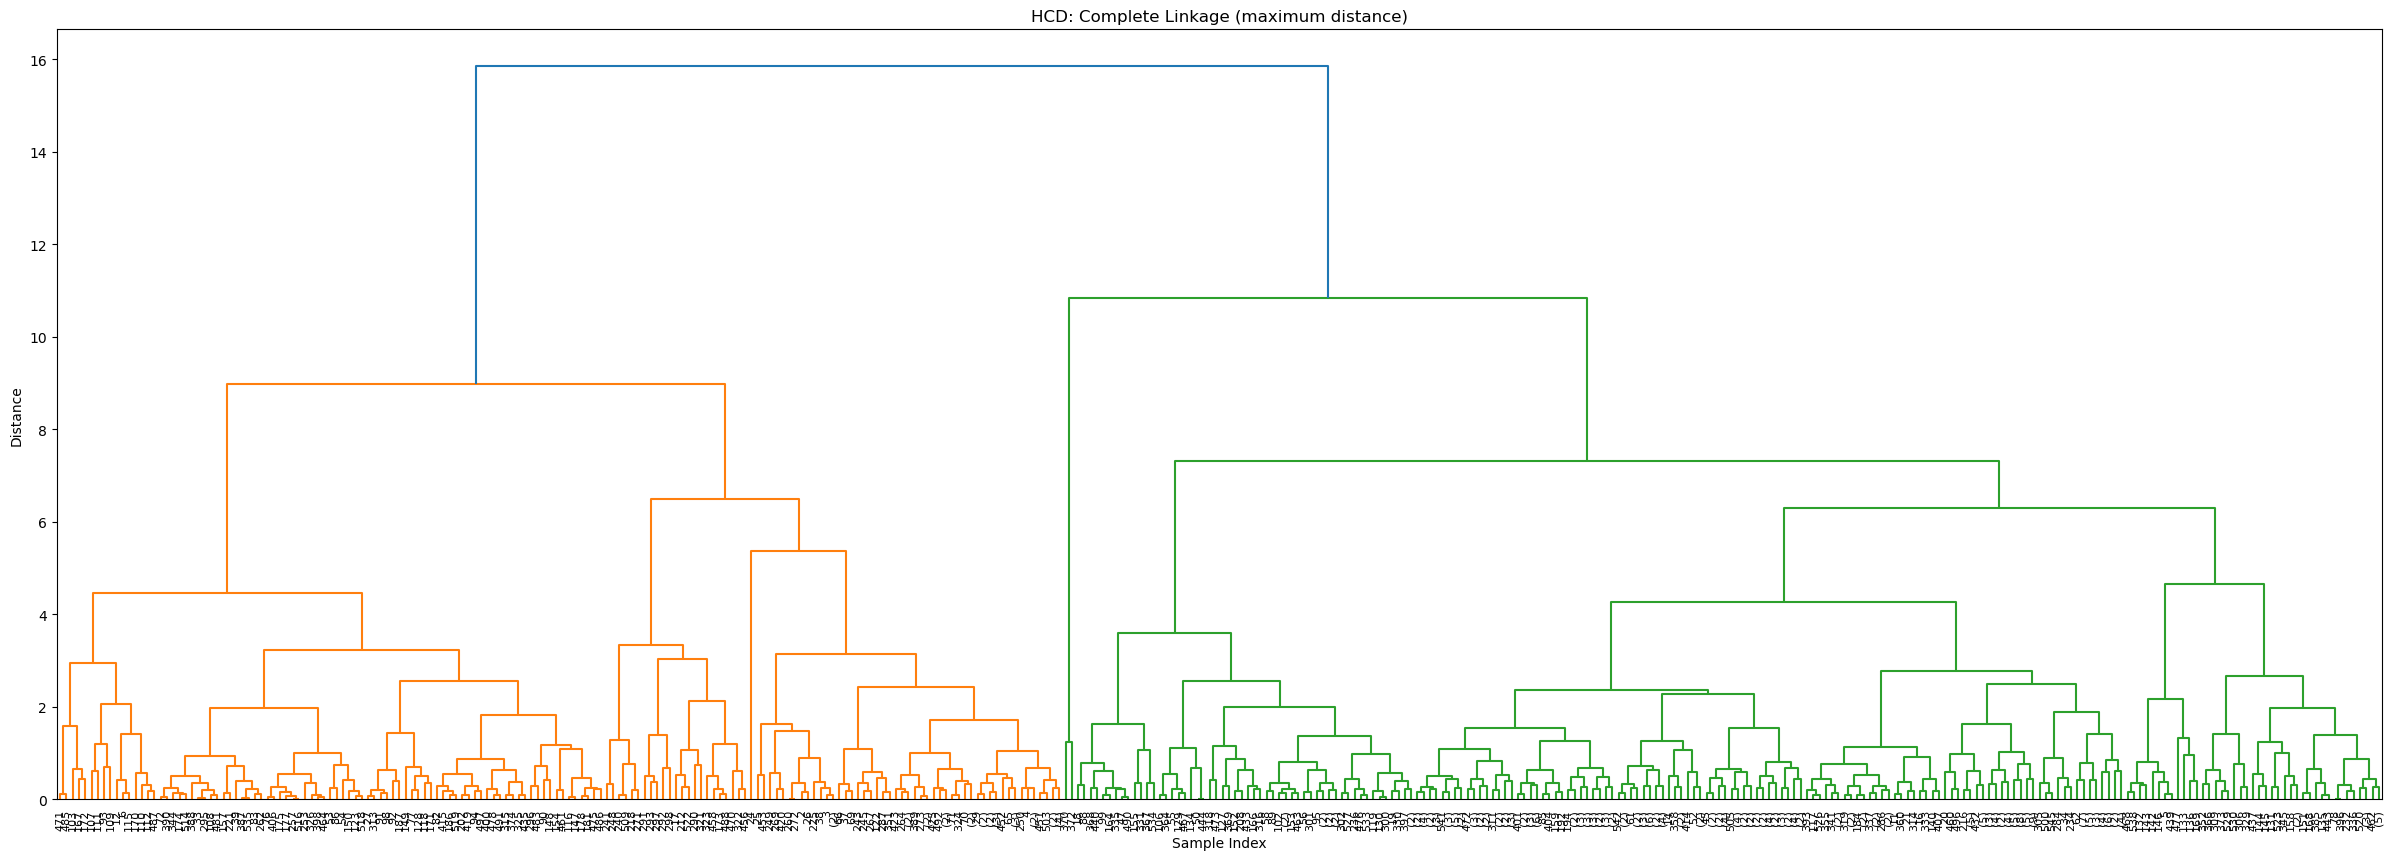

In [21]:
from scipy.cluster.hierarchy import dendrogram

#to calculate the complete linkage dendrogram
plt.figure(figsize =(30, 10))
plt.title('HCD: Complete Linkage (maximum distance)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    hc_complete, truncate_mode = 'level', p=10,
    leaf_rotation =90., #rotates the x axis labels
    leaf_font_size = 8., #font size for the x axis labels
)
plt.show()

In [22]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete, n_clusters = 2).T)

[[0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0
  1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1
  1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
  1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0
  0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0
  0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1
  0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1
  1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
  0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0
  0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 

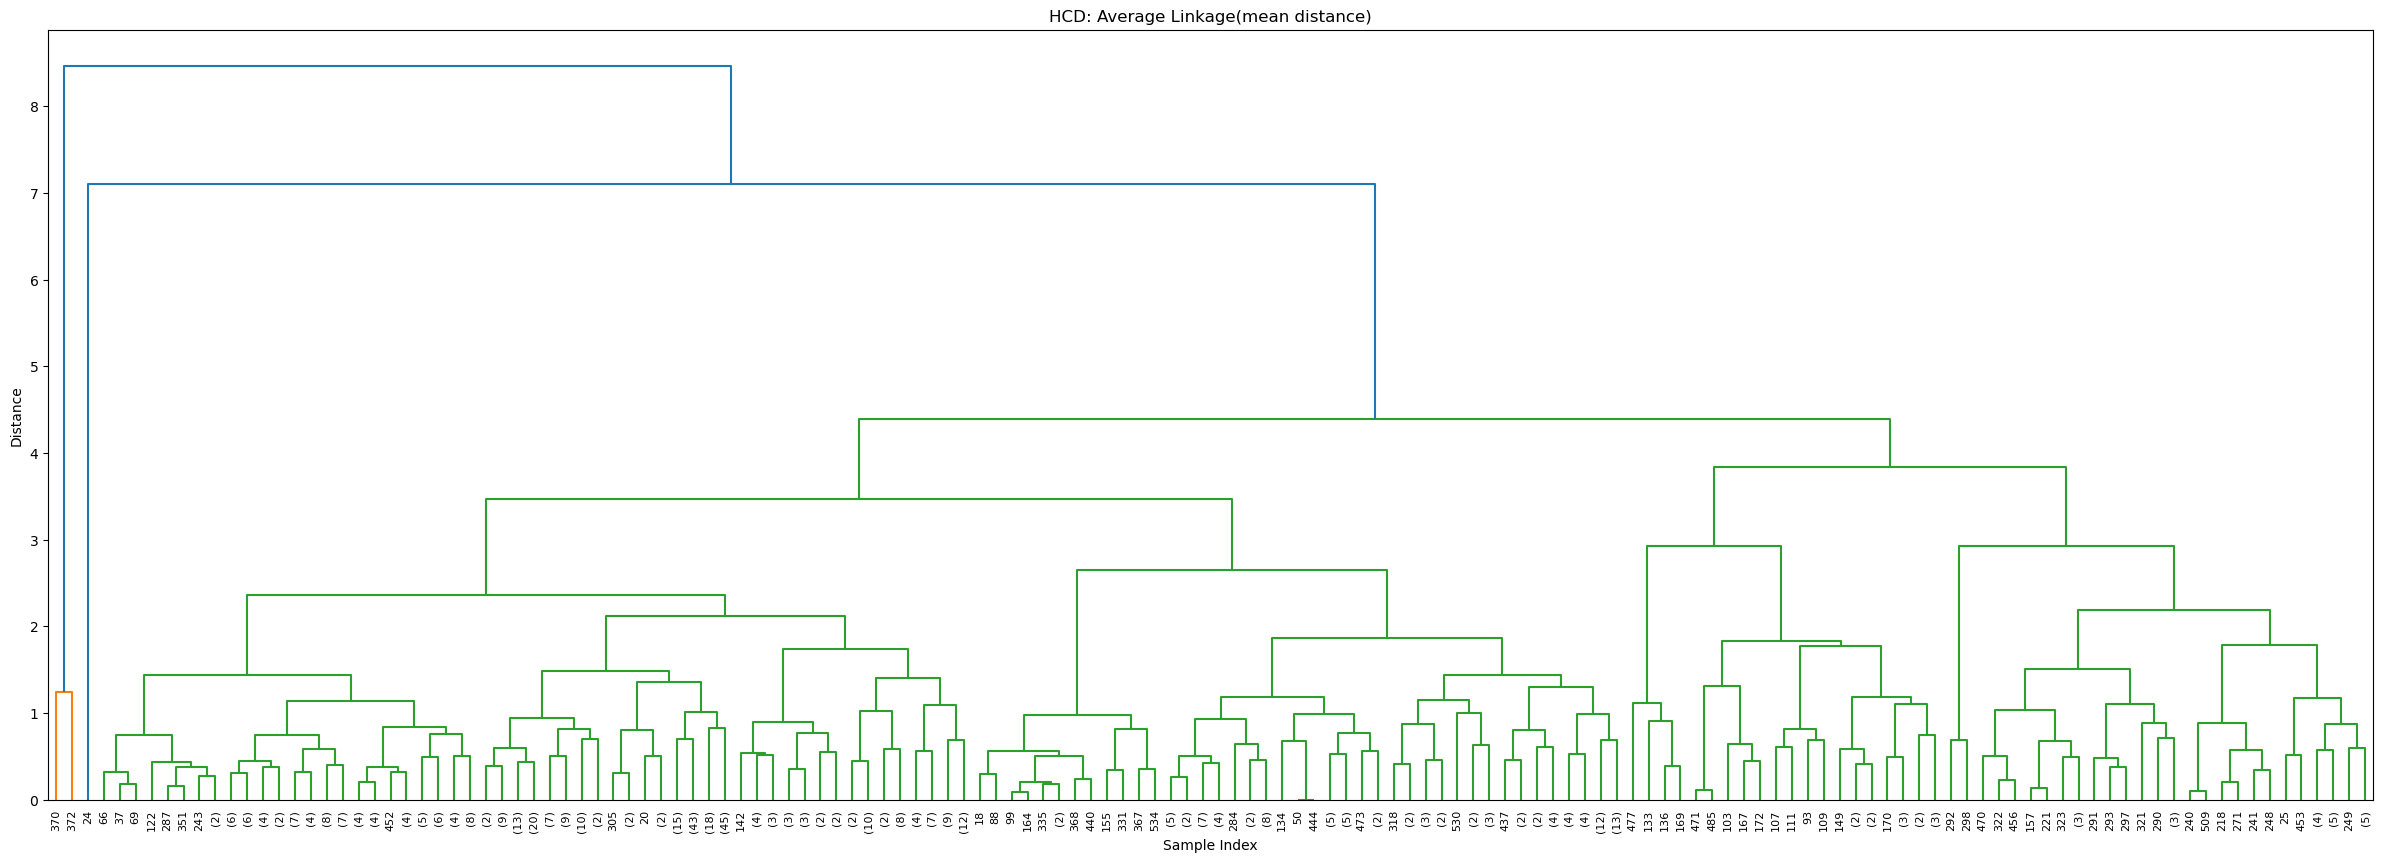

In [23]:
#To calculate the average linkage dendrogram
plt.figure(figsize=(30,10))
plt.title('HCD: Average Linkage(mean distance)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    hc_average,truncate_mode = 'level', p=9,
    leaf_rotation=90., #rotates the x axis labels
    leaf_font_size=8., #font size for the x axis labels
)
plt.show()

In [24]:
print(cut_tree(hc_average, n_clusters = 2).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

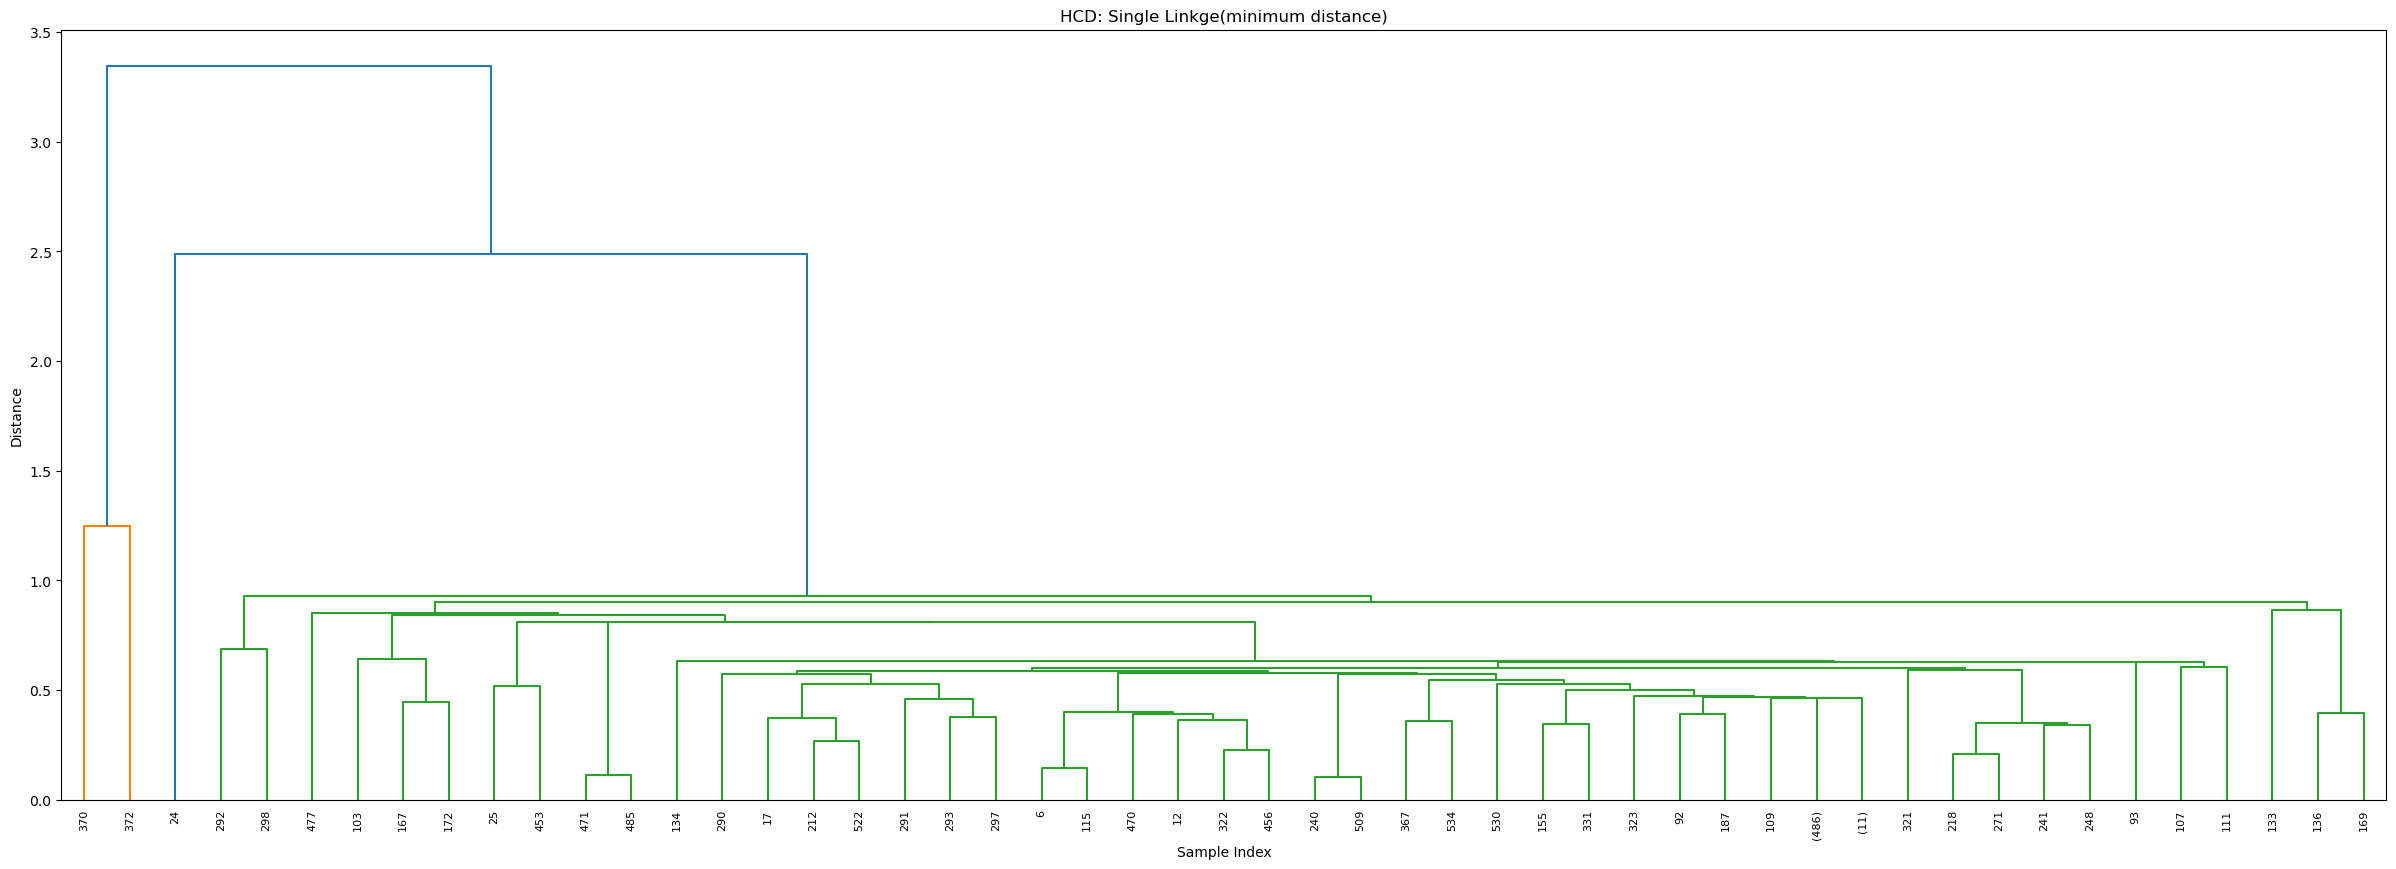

In [25]:
#To calculate the single linkage dendrogram
plt.figure(figsize=(30, 10))
plt.title('HCD: Single Linkge(minimum distance)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    hc_single,truncate_mode='level', p=20,
    leaf_rotation=90., #rotates the x axis labels
    leaf_font_size=8., #font size for the x axis labels
)
plt.show()